In [1]:
# 0) Imports Iniciales y Carga de Datos
# ==========================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from collections import Counter
import tensorflow as tf

# Reproducibilidad
SEED = 42
np.random.seed(SEED); tf.random.set_seed(SEED)

path = "dataset_alpha_betha.csv"
df = pd.read_csv(path)

In [2]:
# %% ==========================================
# 1) Limpieza y Preparación de Variables
# ==========================================

# Convertir y limpiar numéricas
df['Charges'] = pd.to_numeric(df['Charges'], errors='coerce')
df['Demand'] = pd.to_numeric(df['Demand'], errors='coerce')
df['SeniorCity'] = df['SeniorCity'].astype('object')

# Eliminar filas con NaN (solo un puñado, principalmente en Charges)
df.dropna(inplace=True)

# Guardar ID y variable objetivo
# Mapeo: Alpha=1 (Positiva), Betha=0 (Negativa)
y = df['Class'].map({'Alpha': 1, 'Betha': 0}) 

# Variables predictoras: quitamos ID y la clase
X = df.drop(columns=['autoID', 'Class'])

In [3]:
X

,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand
0,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.50
2,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75
4,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,0,Yes,Yes,Yes,Yes,No,Yes,Yes,No,One year,Yes,Credit card (automatic),103.20,7362.90
7040,0,Yes,Yes,No,No phone service,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,1,Yes,No,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [4]:
# %% ==========================================
# 2) División y Escalamiento (Solo Numéricas)
# ==========================================

# 70% entrenamiento, 15% validación, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.15, random_state=SEED, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.17647, random_state=SEED, stratify=y_temp
) # 0.15 / 0.85 ≈ 0.17647 del resto

# 2.1 Escalador fit/transform SOLO en las numéricas de ENTRENAMIENTO
scaler = StandardScaler()
num_cols = ['Charges', 'Demand']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")
print("Distribución de Clases en Train:", Counter(y_train))

Train: (4922, 14), Val: (1055, 14), Test: (1055, 14)
Distribución de Clases en Train: Counter({1: 3613, 0: 1309})


In [5]:
X_train

,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand
2016,0,No,No,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,0.722304,-0.641336
1251,0,No,No,Yes,No,No,Yes,No,No,Month-to-month,No,Electronic check,0.367139,-0.974884
4340,0,No,Yes,Yes,No,No,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),-0.538282,-0.904468
602,0,Yes,Yes,Yes,Yes,No,No,No,No,One year,Yes,Bank transfer (automatic),0.315448,1.138236
1562,0,Yes,Yes,No,No phone service,Yes,No,No,Yes,Month-to-month,No,Mailed check,-1.005166,-0.899432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,0,No,No,Yes,No,Yes,Yes,No,Yes,Two year,Yes,Mailed check,-0.173113,0.643712
1004,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,-1.493727,-0.823847
1836,0,No,No,Yes,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1.040786,-0.070763
4491,0,No,No,Yes,No,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),-1.502064,-0.999644


In [6]:
# %% ==========================================
# 3) One-Hot Encoding (TODOS los sets) y Limpieza Final
# ==========================================

# One-Hot Encoding para categóricas (usando el índice de Train para asegurar consistencia)
X_combined = pd.concat([X_train, X_val, X_test], ignore_index=True)
X_combined = pd.get_dummies(X_combined, drop_first=True)

# Re-dividir después del OHE
N_train = len(X_train)
N_val = len(X_val)

X_train = X_combined.iloc[:N_train]
X_val = X_combined.iloc[N_train:N_train + N_val]
X_test = X_combined.iloc[N_train + N_val:]

# Drop de variables redundantes (las que identificaste antes)
cols_to_drop = [
    'Security_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'Service2_No phone service'
]
X_train = X_train.drop(columns=cols_to_drop, errors='ignore')
X_val = X_val.drop(columns=cols_to_drop, errors='ignore')
X_test = X_test.drop(columns=cols_to_drop, errors='ignore')

# Convertir a numpy arrays (Necesario para Keras/TensorFlow)
X_train_sc = X_train.values
X_val_sc = X_val.values
X_test_sc = X_test.values

In [7]:
# %% ==========================================
# 4) Pesos de Clase (Balanceo - SIN SMOTE)
# ==========================================
classes = np.array([0, 1])
weights = class_weight.compute_class_weight(
    class_weight="balanced", classes=classes, y=y_train
)
class_weights = {0: float(weights[0]), 1: float(weights[1])}
print("\n✅ Pesos de Clase (para balancear el set de entrenamiento):", class_weights)

# %%


✅ Pesos de Clase (para balancear el set de entrenamiento): {0: 1.880061115355233, 1: 0.6811513977304179}


MODELADO

In [8]:
# %% ==========================================
# 5) Modelo de Red Neuronal (MLP)
# ==========================================
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve
from tensorflow.keras.models import load_model, save_model

INPUT_DIM   = X_train_sc.shape[1] 
DROPOUT     = 0.3
L2_WD       = 0.1 
LR          = 3e-4 
BATCH_SIZE  = 32    
EPOCHS      = 200

# Función para construir la arquitectura (tomada de tu ejemplo)
def build_model(input_dim: int, dropout_rate=DROPOUT, l2_wd=L2_WD):
    m = keras.Sequential([
        layers.Input(shape=(INPUT_DIM,)),
        layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(32, activation="relu", kernel_regularizer=keras.regularizers.L2(0.01)),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid")
    ])
    return m  # 👈 Faltaba esto

model = build_model(INPUT_DIM, DROPOUT, L2_WD)

# Optimizador y Compilación
try:
    optimizer = keras.optimizers.AdamW(learning_rate=LR, weight_decay=1e-4)
except Exception:
    optimizer = keras.optimizers.Adam(learning_rate=LR)

metrics = [
    keras.metrics.BinaryAccuracy(name="accuracy", threshold=0.5),
    keras.metrics.AUC(name="auc", curve="ROC", from_logits=False),
    keras.metrics.AUC(name="pr_auc", curve="PR", from_logits=False),
]

model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=metrics)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3329 (13.00 KB)
Trainable params: 3329 (13.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# %% ==========================================
# 6) Callbacks y Entrenamiento (CON F1 DE TRAIN EN CALLBACK)
# ==========================================
import numpy as np
from tensorflow import keras
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras import layers # Importamos por si acaso no estaba en el Bloque 5

# --- 1. Definición de Arrays con Dtype Asegurado (Soluciona el NameError) ---

y_train_arr = y_train.values.astype(np.float32)
y_val_arr = y_val.values.astype(np.float32)
X_train_sc_arr = X_train_sc.astype(np.float32)
X_val_sc_arr = X_val_sc.astype(np.float32)

# --- 2. Clase F1PerEpoch (CORREGIDA para F1 de Train) ---
class F1PerEpoch(keras.callbacks.Callback):
    def __init__(self, X_train, y_train, X_val, y_val, threshold=0.5):
        super().__init__()
        # Usamos los arrays ya definidos
        self.Xtr, self.ytr = X_train, y_train
        self.Xva, self.yva = X_val, y_val
        self.th = threshold
        # Añadimos 'f1' para el F1 de entrenamiento
        self.history_extra = {"f1": [], "val_f1": [], "val_auc_sklearn": []}

    def on_train_begin(self, logs=None):
        self.history_extra = {"f1": [], "val_f1": [], "val_auc_sklearn": []}

    def on_epoch_end(self, epoch, logs=None):
        # Predicciones en train
        p_tr = self.model.predict(self.Xtr, verbose=0).ravel()
        yhat_tr = (p_tr >= self.th).astype(int)
        f1_tr = f1_score(self.ytr, yhat_tr, zero_division=0)
        self.history_extra["f1"].append(f1_tr) # Guardamos el F1 de train

        # Predicciones en validación
        p_va = self.model.predict(self.Xva, verbose=0).ravel()
        yhat_va = (p_va >= self.th).astype(int)
        f1_va = f1_score(self.yva, yhat_va, zero_division=0)
        try:
            auc_va = roc_auc_score(self.yva, p_va)
        except Exception:
            auc_va = np.nan

        self.history_extra["val_f1"].append(f1_va)
        self.history_extra["val_auc_sklearn"].append(auc_va)
        
        # Agregamos ambas métricas a los logs del Keras para visualización del progreso
        logs['f1'] = f1_tr 
        logs['val_f1'] = f1_va 
        print(f" — f1: {f1_tr:.4f} — val_f1: {f1_va:.4f} — val_auc(sklearn): {auc_va:.4f}")

# --- 3. Inicializar Callbacks ---
f1_cb = F1PerEpoch(X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr, threshold=0.5)

early_cb = keras.callbacks.EarlyStopping(
    monitor="val_f1", mode="max", 
    patience=20, min_delta=1e-4,
    restore_best_weights=True
)

ckpt_cb = keras.callbacks.ModelCheckpoint(
    filepath="best_mlp_by_pr_auc.weights.h5", 
    monitor="val_pr_auc", mode="max",
    save_best_only=True, save_weights_only=True
)

rlrop = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", mode="min",
    factor=0.5, patience=10,
    min_lr=1e-6, verbose=1
)

# --- 4. Entrenamiento ---
history = model.fit(
    X_train_sc_arr, y_train_arr, 
    validation_data=(X_val_sc_arr, y_val_arr), 
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    class_weight=class_weights,
    callbacks=[f1_cb, early_cb, ckpt_cb, rlrop],
    verbose=1
)

# Cargar los mejores pesos guardados por el ModelCheckpoint
model.load_weights("best_mlp_by_pr_auc.weights.h5")
# %%

Epoch 1/200
154/154 [==============================] - 4s 12ms/step - loss: 1.3168 - accuracy: 0.5244 - auc: 0.5448 - pr_auc: 0.7684 - val_loss: 1.1544 - val_accuracy: 0.6919 - val_auc: 0.7823 - val_pr_auc: 0.9116 - f1: 0.7790 - val_f1: 0.7601 - lr: 3.0000e-04
Epoch 2/200
154/154 [==============================] - 1s 8ms/step - loss: 1.0579 - accuracy: 0.6924 - auc: 0.7714 - pr_auc: 0.8985 - val_loss: 0.9481 - val_accuracy: 0.7270 - val_auc: 0.8160 - val_pr_auc: 0.9251 - f1: 0.8111 - val_f1: 0.7949 - lr: 3.0000e-04
Epoch 3/200
154/154 [==============================] - 1s 7ms/step - loss: 0.8901 - accuracy: 0.7261 - auc: 0.8071 - pr_auc: 0.9159 - val_loss: 0.8172 - val_accuracy: 0.7327 - val_auc: 0.8236 - val_pr_auc: 0.9274 - f1: 0.8199 - val_f1: 0.8006 - lr: 3.0000e-04
Epoch 4/200
154/154 [==============================] - 1s 7ms/step - loss: 0.7869 - accuracy: 0.7424 - auc: 0.8194 - pr_auc: 0.9221 - val_loss: 0.7527 - val_accuracy: 0.7213 - val_auc: 0.8269 - val_pr_auc: 0.9289 - f1: 

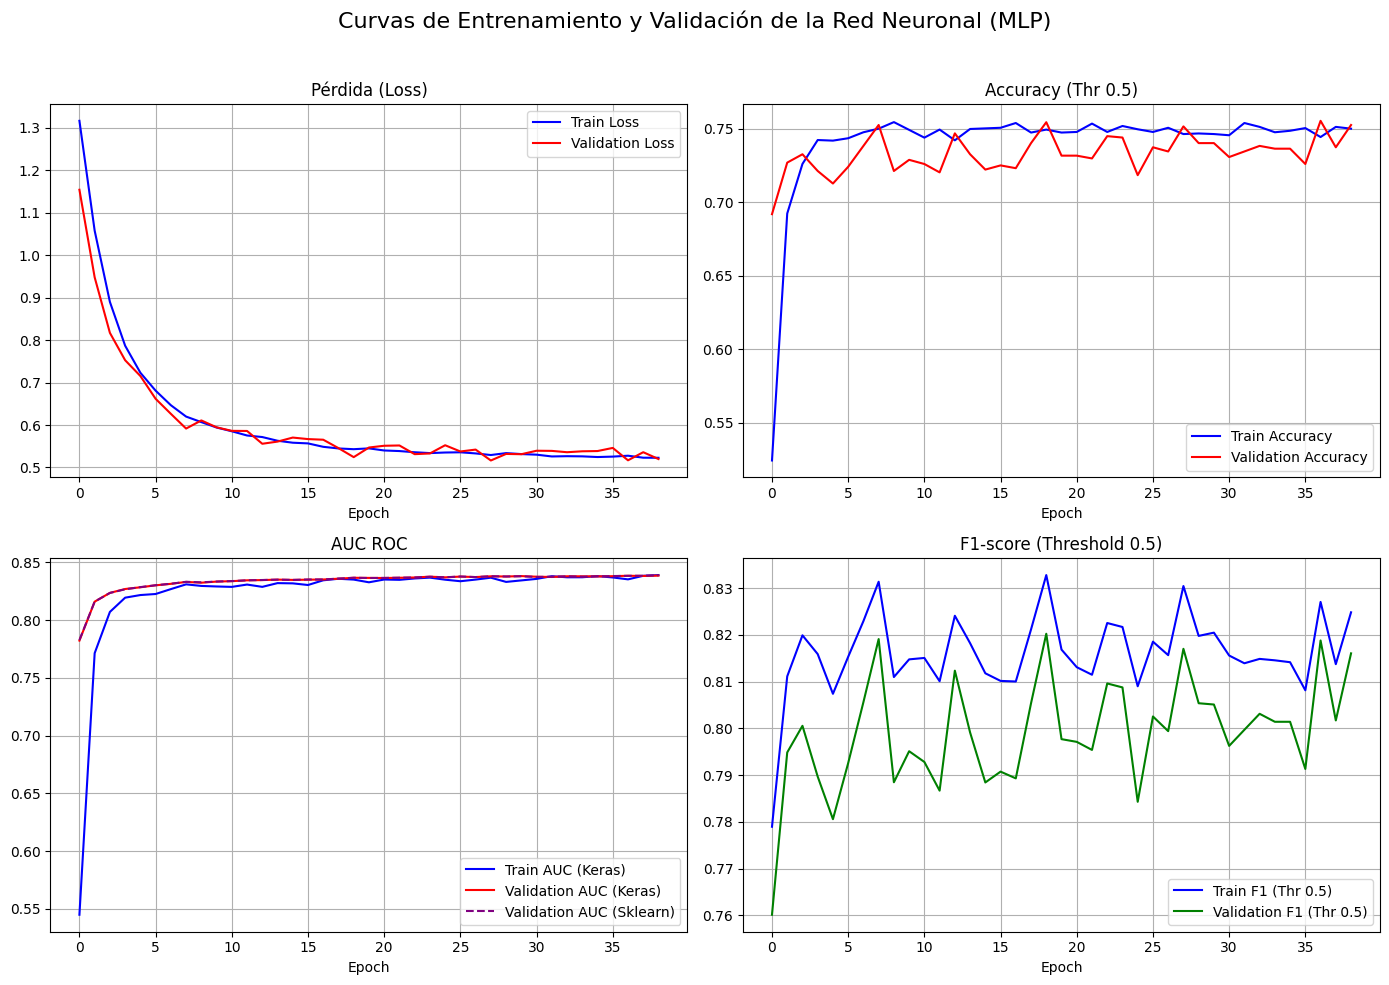

In [10]:
# %% ============================================
# 10) Curvas de entrenamiento y validación (CON F1 DE TRAIN)
# ============================================
import pandas as pd
import matplotlib.pyplot as plt

# 1. Alinear longitudes del historial 
# Aseguramos que los arrays de historia tengan la misma longitud para graficar
len_hist = len(history.history["loss"])
len_f1 = len(f1_cb.history_extra["f1"]) 
min_len = min(len_hist, len_f1)

# 2. Crear un DataFrame de historial consolidado
hist = pd.DataFrame(history.history).iloc[:min_len].copy()
hist["f1"] = f1_cb.history_extra["f1"][:min_len] # Añadir F1 de entrenamiento
hist["val_f1"] = f1_cb.history_extra["val_f1"][:min_len]
hist["val_auc_sklearn"] = f1_cb.history_extra["val_auc_sklearn"][:min_len]

# 3. Graficar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# 3.1 Pérdida (Loss)
axes[0].plot(hist["loss"], label="Train Loss", color='blue')
axes[0].plot(hist["val_loss"], label="Validation Loss", color='red')
axes[0].set_title("Pérdida (Loss)"); axes[0].set_xlabel("Epoch")
axes[0].legend(); axes[0].grid(True)

# 3.2 Accuracy
axes[1].plot(hist["accuracy"], label="Train Accuracy", color='blue')
axes[1].plot(hist["val_accuracy"], label="Validation Accuracy", color='red')
axes[1].set_title("Accuracy (Thr 0.5)"); axes[1].set_xlabel("Epoch")
axes[1].legend(); axes[1].grid(True)

# 3.3 AUC ROC
axes[2].plot(hist["auc"], label="Train AUC (Keras)", color='blue')
axes[2].plot(hist["val_auc"], label="Validation AUC (Keras)", color='red')
axes[2].plot(hist["val_auc_sklearn"], label="Validation AUC (Sklearn)", linestyle="--", color='purple')
axes[2].set_title("AUC ROC"); axes[2].set_xlabel("Epoch")
axes[2].legend(); axes[2].grid(True)

# 3.4 F1-score (¡Con Train y Validation!)
axes[3].plot(hist["f1"], label="Train F1 (Thr 0.5)", color='blue')      
axes[3].plot(hist["val_f1"], label="Validation F1 (Thr 0.5)", color='green') 
axes[3].set_title("F1-score (Threshold 0.5)"); axes[3].set_xlabel("Epoch")
axes[3].legend(); axes[3].grid(True)

plt.suptitle("Curvas de Entrenamiento y Validación de la Red Neuronal (MLP)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# %%

In [11]:
# %% ============================================
# 7) Umbral Óptimo en VALIDACIÓN y Métricas Finales
# ============================================
from sklearn.metrics import classification_report, f1_score, roc_auc_score, precision_recall_curve
from numpy import argmax

# Aseguramos que los arrays de test sean np.float32/int32
y_test_arr = y_test.values.astype(np.int32)
X_test_sc_arr = X_test_sc.astype(np.float32)
# y_val_arr ya debe estar definido del Bloque 6

# 7.1 Encontrar Umbral Óptimo en VALIDACIÓN
p_val = model.predict(X_val_sc_arr).ravel()

# Calcular curva Precision-Recall
prec, rec, thr = precision_recall_curve(y_val_arr, p_val)
f1_vals = 2 * (prec * rec) / (prec + rec + 1e-12) 
best_idx = np.nanargmax(f1_vals)

best_thr = thr[best_idx] if best_idx < len(thr) else 0.5

print("\n=== Umbral Óptimo (Validación) ===")
print(f"Mejor Umbral F1: {best_thr:.4f}")
print(f"F1 Score Máximo en Validación: {f1_vals[best_idx]:.4f}")

# 7.2 Evaluación FINAL en TEST con el Umbral Óptimo
p_test = model.predict(X_test_sc_arr).ravel()
yhat_test_best = (p_test >= best_thr).astype(int)

f1_final_nn = f1_score(y_test_arr, yhat_test_best)
auc_final_nn = roc_auc_score(y_test_arr, p_test)

print("\n=== MÉTRICAS FINALES DE LA RED NEURONAL (Umbral Optimizado) ===")
print(f"F1 Score FINAL: {f1_final_nn:.4f}")
print(f"AUC: {auc_final_nn:.4f}")
print("---------------------------------------------")
print("Reporte (thr_best):\n", classification_report(y_test_arr, yhat_test_best, digits=4))

# %%

33/33 [==============================] - 0s 924us/step

=== Umbral Óptimo (Validación) ===
Mejor Umbral F1: 0.2009
F1 Score Máximo en Validación: 0.8810
33/33 [==============================] - 0s 1ms/step

=== MÉTRICAS FINALES DE LA RED NEURONAL (Umbral Optimizado) ===
F1 Score FINAL: 0.8655
AUC: 0.8439
---------------------------------------------
Reporte (thr_best):
               precision    recall  f1-score   support

           0     0.7168    0.2893    0.4122       280
           1     0.7887    0.9587    0.8655       775

    accuracy                         0.7810      1055
   macro avg     0.7528    0.6240    0.6388      1055
weighted avg     0.7697    0.7810    0.7452      1055



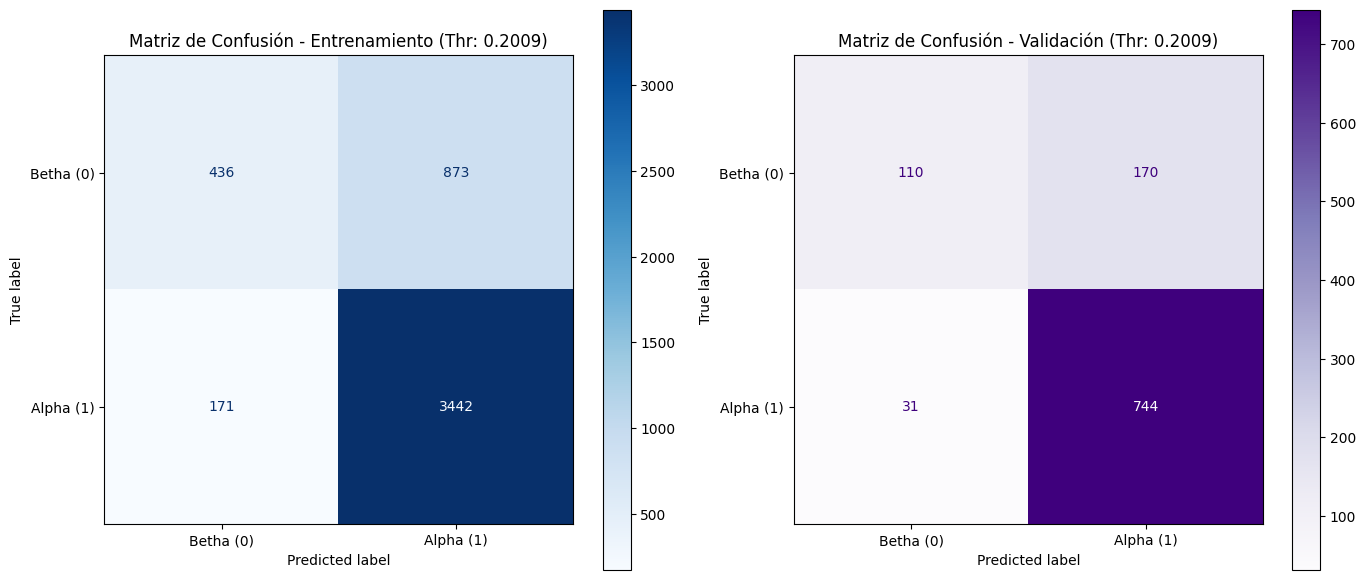

In [12]:
# %% ============================================
# 7B) Matrices de Confusión Adicionales (Train y Val)
# ============================================
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# El mejor umbral se obtuvo en el Paso 7A/6:
# best_thr = 0.1656

# Aseguramos que los arrays de train y val sean np.float32/int32
# (Ya deberían estar definidos del Bloque 6: X_train_sc_arr, y_train_arr, X_val_sc_arr, y_val_arr)

# 1. Predicciones con el MEJOR Umbral (0.1656)

# Predicciones en Entrenamiento
p_train = model.predict(X_train_sc_arr, verbose=0).ravel()
yhat_train_best = (p_train >= best_thr).astype(int)

# Predicciones en Validación
p_val = model.predict(X_val_sc_arr, verbose=0).ravel()
yhat_val_best = (p_val >= best_thr).astype(int)


# 2. Gráficas de las Matrices de Confusión

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
class_names = ['Betha (0)', 'Alpha (1)']


# Matriz de Confusión en Entrenamiento (Para ver el sobreajuste)
cm_train = confusion_matrix(y_train_arr, yhat_train_best)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=class_names)
disp_train.plot(ax=axes[0], cmap=plt.cm.Blues, values_format='d')
axes[0].set_title(f'Matriz de Confusión - Entrenamiento (Thr: {best_thr:.4f})')


# Matriz de Confusión en Validación (Para ver el rendimiento donde se optimizó)
cm_val = confusion_matrix(y_val_arr, yhat_val_best)
disp_val = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=class_names)
disp_val.plot(ax=axes[1], cmap=plt.cm.Purples, values_format='d')
axes[1].set_title(f'Matriz de Confusión - Validación (Thr: {best_thr:.4f})')

plt.tight_layout()
plt.show()

# %%

In [17]:
import tensorflow as tf
from tensorflow.keras import backend as K

@tf.function
def compute_gradients(model, inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        preds = model(inputs)
    grads = tape.gradient(preds, inputs)
    return grads

inputs_tf = tf.convert_to_tensor(X_val_sc[:200], dtype=tf.float32)
grads = compute_gradients(model, inputs_tf)
grads_mean = tf.reduce_mean(tf.abs(grads), axis=0).numpy()


=== Importancia (Gradientes) ===
                           feature  mean_abs_gradient
13               Contract_Two year           0.179369
0                          Charges           0.155906
1                           Demand           0.120581
12               Contract_One year           0.104469
5                     Service1_Yes           0.085670
11                 TechSupport_Yes           0.084768
7                     Security_Yes           0.074897
16  PaymentMethod_Electronic check           0.059942
8                 OnlineBackup_Yes           0.055354
2                     SeniorCity_1           0.054328


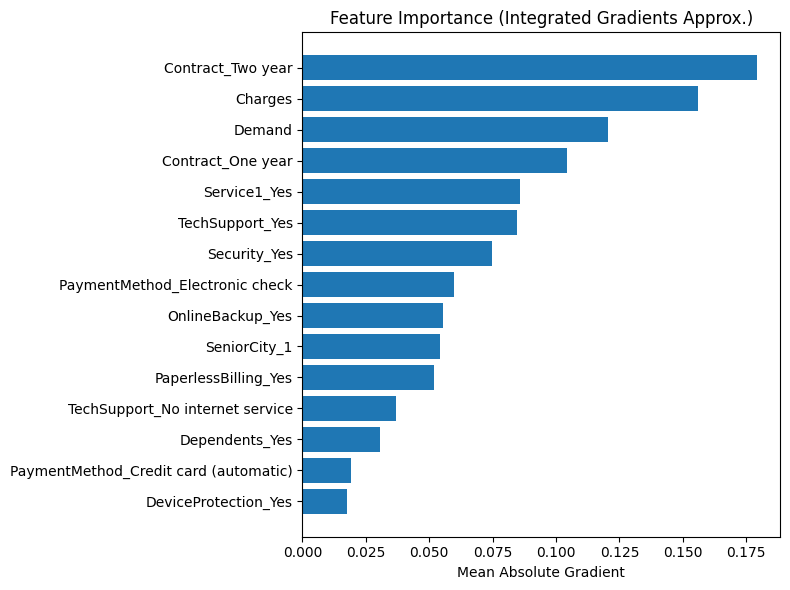

In [19]:
# ==========================================
# 🔍 Importancia de Variables (por Gradientes)
# ==========================================
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Calcular gradientes de salida respecto a las entradas
@tf.function
def compute_gradients(model, inputs):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        preds = model(inputs)
    grads = tape.gradient(preds, inputs)
    return grads

# 2️⃣ Convertir a tensor de TensorFlow (usa un subset para velocidad)
inputs_tf = tf.convert_to_tensor(X_val_sc[:200], dtype=tf.float32)

# 3️⃣ Calcular gradientes y magnitudes promedio
grads = compute_gradients(model, inputs_tf)
grads_mean = tf.reduce_mean(tf.abs(grads), axis=0).numpy()

# 4️⃣ Crear DataFrame ordenado por importancia
grad_importance = pd.DataFrame({
    "feature": X_val.columns,
    "mean_abs_gradient": grads_mean
}).sort_values(by="mean_abs_gradient", ascending=False)

# 5️⃣ Mostrar las 10 variables más influyentes
print("=== Importancia (Gradientes) ===")
print(grad_importance.head(10))

# 6️⃣ Visualización
plt.figure(figsize=(8, 6))
plt.barh(grad_importance["feature"][:15], grad_importance["mean_abs_gradient"][:15])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Integrated Gradients Approx.)")
plt.xlabel("Mean Absolute Gradient")
plt.tight_layout()
plt.show()
